#   Импортируем библиотеки

In [1]:
# Импортируйте необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import pickle
from datetime import datetime
from statistics import mode
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 

# Изучаем датасет

In [4]:
df_hits = pd.read_csv('ga_hits.csv', low_memory=False)
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [5]:
df_session = pd.read_csv('ga_sessions.csv', low_memory=False)
df_session.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [6]:
list=['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df_hits['target']=df_hits['event_action'].apply(lambda x: 1 if x in list else 0)
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
 11  target          int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ GB


In [7]:
df_short = df_hits.groupby(['session_id'])['target'].sum().reset_index()
df_short

,session_id,target
0,1000009318903347362.1632663668.1632663668,0
1,1000010177899156286.1635013443.1635013443,0
2,1000013386240115915.1635402956.1635402956,0
3,1000017303238376207.1623489300.1623489300,0
4,1000020580299877109.1624943350.1624943350,0
...,...,...
1734605,999960188766601545.1626816843.1626816843,0
1734606,99996598443387715.1626811203.1626811203,0
1734607,999966717128502952.1638428330.1638428330,0
1734608,999988617151873171.1623556243.1623556243,0


In [8]:
df_short["target"] = df_short["target"].apply(lambda x: 1 if x > 0 else 0)
df_short

,session_id,target
0,1000009318903347362.1632663668.1632663668,0
1,1000010177899156286.1635013443.1635013443,0
2,1000013386240115915.1635402956.1635402956,0
3,1000017303238376207.1623489300.1623489300,0
4,1000020580299877109.1624943350.1624943350,0
...,...,...
1734605,999960188766601545.1626816843.1626816843,0
1734606,99996598443387715.1626811203.1626811203,0
1734607,999966717128502952.1638428330.1638428330,0
1734608,999988617151873171.1623556243.1623556243,0


In [11]:
df_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [9]:
df_unv = df_session.merge(df_short, on=['session_id'], how='left')
df_unv

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0.0
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,0.0
1860039,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0.0
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0.0


In [10]:
df_unv['target'].fillna(0, inplace=True)

In [11]:
df_unv['target'].value_counts()

target
0.0    1809728
1.0      50314
Name: count, dtype: int64

In [13]:
df_unv.to_csv('sessions_unv.csv')

#  Разделяем на тестовые выборки 

In [17]:
dv_unv = dv_unv.drop(columns=['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number'])
df_test1 = dv_unv[dv_unv['target'] == 0].dropna().sample(n=50, random_state=12)
df_test2 = dv_unv[dv_unv['target'] == 1].dropna().sample(n=50, random_state=12)

pd.concat([df_test1, df_test2]).drop(columns='target').to_csv('df_test.csv', index_label=False, sep=',')

# Выводим API
dv_unv.dropna().drop(columns='target').sample(n=1, random_state=12).to_json('json_test.json', orient="records")

In [15]:
X = df_unv.drop(columns=['target'])
y = df_unv['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Анализируем модели машин   


In [38]:
df_mod = df_hits.groupby(['session_id','hit_page_path'])['target'].sum().reset_index()
df_mod.head()

,session_id,hit_page_path,target
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/,0
1,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0
2,1000009318903347362.1632663668.1632663668,sberauto.com/cars/2fc745ed?utm_source_initial=...,0
3,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0
4,1000010177899156286.1635013443.1635013443,sberauto.com/cars?city=1&city=18&rental_page=r...,0


In [40]:
df_mod["brend"] = df_mod["hit_page_path"].apply(lambda x: x.split('/')[3]  if 'sberauto.com/cars/all/' in x else '*')
df_mod["model"] = df_mod["hit_page_path"].apply(lambda x: x.split('/')[4]  if 'sberauto.com/cars/all/' in x else '*')

In [41]:
df_mod = df_mod[df_mod['brend'] !='*']
df_mod

,session_id,hit_page_path,target,brend,model
6,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,lada-vaz,vesta
18,1000043953525145011.1638186424.1638186424,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,0,skoda,rapid
19,1000043953525145011.1638186424.1638186424,sberauto.com/cars/all/volkswagen/polo/e994838f...,0,volkswagen,polo
22,1000043953525145011.1638786530.1638786530,sberauto.com/cars/all/renault/duster/145d53f1?...,0,renault,duster
23,1000043953525145011.1638786530.1638786530,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,0,skoda,rapid
...,...,...,...,...,...
3231593,999878167786470953.1637139295.1637139295,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,0,kia,sorento
3231594,999878167786470953.1637139295.1637139295,sberauto.com/cars/all/lexus/rx/566d6b75?utm_so...,0,lexus,rx
3231595,999878167786470953.1637139295.1637139295,sberauto.com/cars/all/volkswagen/touareg/9e072...,0,volkswagen,touareg
3231601,999899805834287423.1639717182.1639717182,sberauto.com/cars/all/renault/duster/145d53f1?...,0,renault,duster


    model  target
43  rapid    5861
60  vesta    5219
38   polo    4454
45    rio    1408
29  karoq    1298


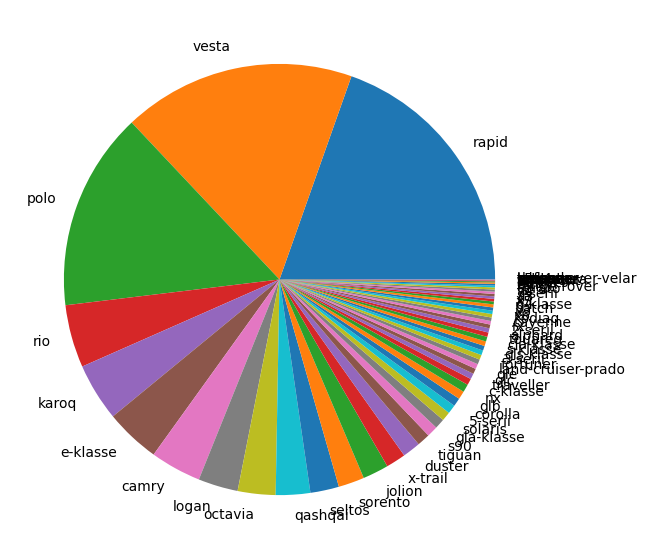

In [42]:
cars = df_mod.groupby(['model'])['target'].sum().reset_index()
cars = cars.sort_values('target', ascending=False)
print(cars.head())
fig = plt.figure(figsize=(10, 7))
plt.pie(cars['target'], labels=cars['model'])

plt.show()

            brend  target
14          skoda    8085
5        lada-vaz    5219
16     volkswagen    4864
4             kia    2694
8   mercedes-benz    2401


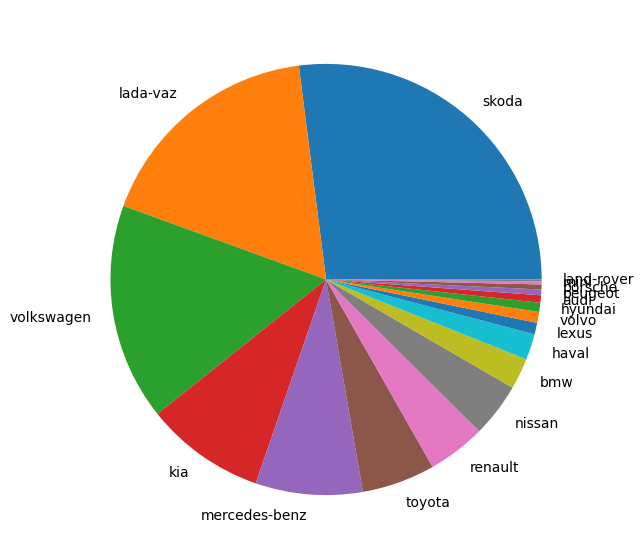

In [43]:
cars = df_mod.groupby(['brend'])['target'].sum().reset_index()
cars = cars.sort_values('target', ascending=False)
print(cars.head())
fig = plt.figure(figsize=(10, 7))
plt.pie(cars['target'], labels=cars['brend'])
 
plt.show()

# Data Preparation and Data Cleaning

In [44]:
df = pd.read_csv("sessions_unv.csv", low_memory=False)
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target                    float64
dtypes: float64(1), int64(1), object(17)
memory usage: 269.6+ MB


In [24]:
missing_values = df.isna().sum().sort_values(ascending=False)
print('Пропущенных значений:\n', missing_values)

Пропущенных значений:
 device_model                1843704
utm_keyword                 1082061
device_os                   1070138
device_brand                 367178
utm_adcontent                335615
utm_campaign                 219603
utm_source                       97
geo_city                          0
geo_country                       0
device_browser                    0
device_screen_resolution          0
session_id                        0
device_category                   0
client_id                         0
utm_medium                        0
visit_number                      0
visit_time                        0
visit_date                        0
target                            0
dtype: int64


In [25]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей     выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))

    
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей     выборки:  14940
Процент полностью заполненных объектов из всей выборки:  0.8


<Axes: >

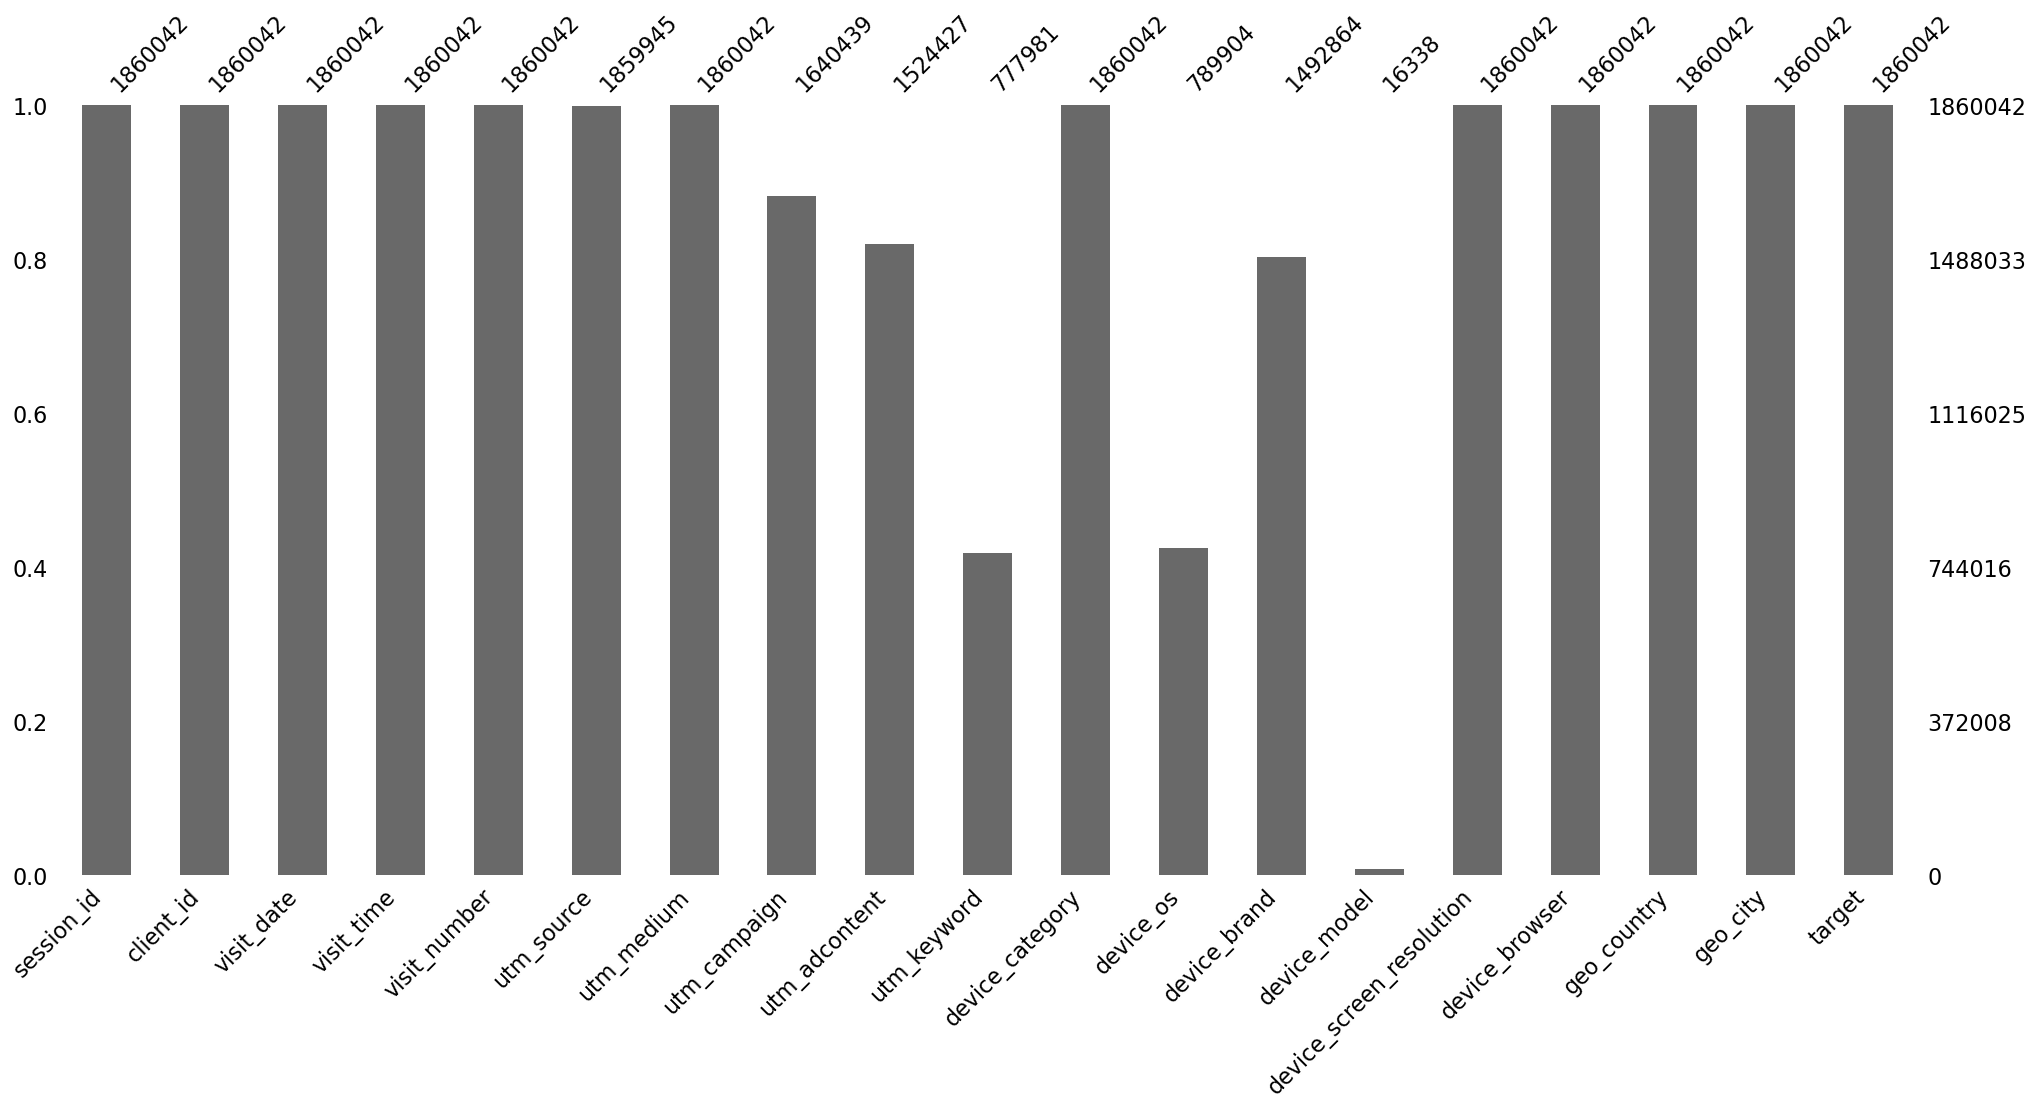

In [26]:
import missingno as msno

msno.bar(df)

C:\Users\User\AppData\Local\Temp\ipykernel_5920\2040561193.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax1.hist(pd.to_datetime(df['visit_time']).apply(lambda x: x.hour), bins=24, color='b', rwidth=0.9)
C:\Users\User\AppData\Local\Temp\ipykernel_5920\2040561193.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax2.hist(pd.to_datetime(df[df['target'] == 1]['visit_time']).apply(lambda x: x.hour), bins=24, color='g', rwidth=0.9)
C:\Users\User\AppData\Local\Temp\ipykernel_5920\2040561193.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax3.hist(pd.to_datetime(df[df

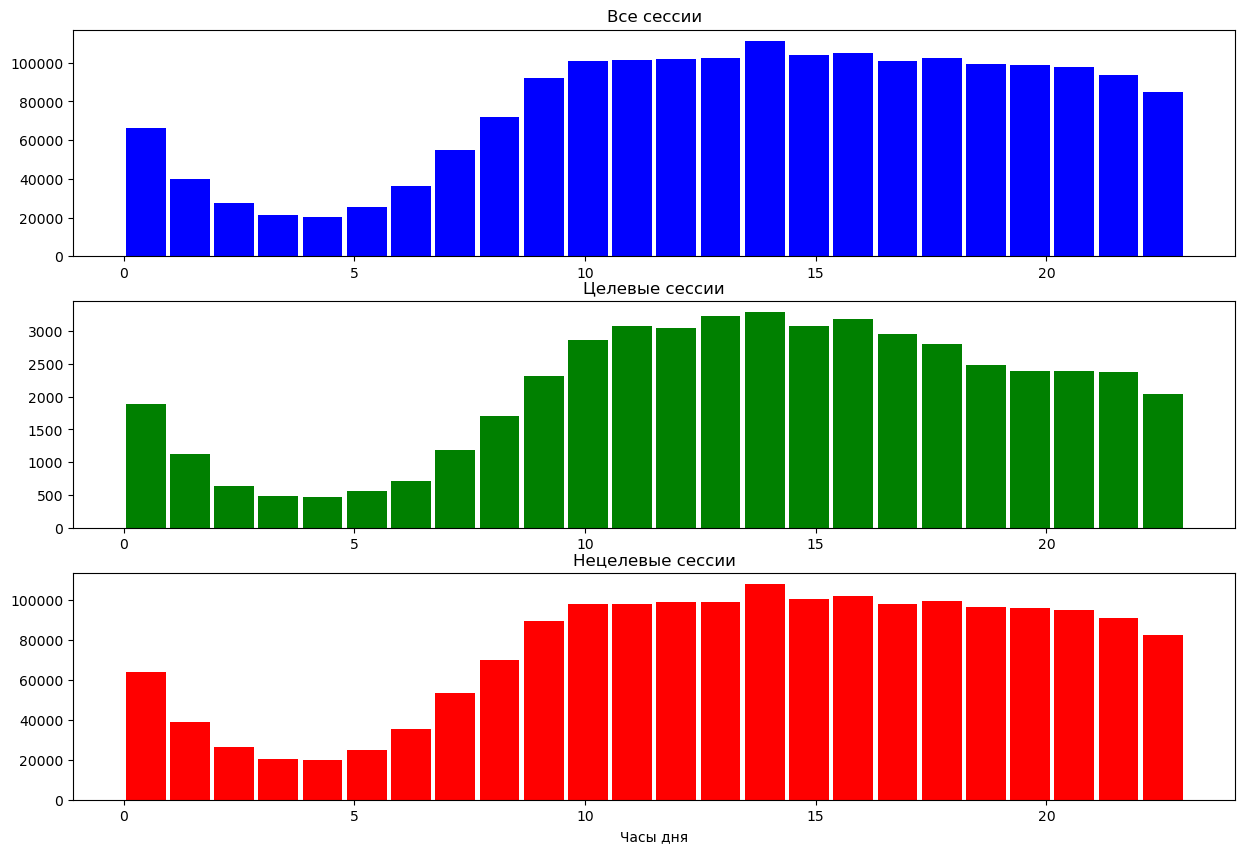

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

ax1.hist(pd.to_datetime(df['visit_time']).apply(lambda x: x.hour), bins=24, color='b', rwidth=0.9)
ax1.set_title('Все сессии')

ax2.hist(pd.to_datetime(df[df['target'] == 1]['visit_time']).apply(lambda x: x.hour), bins=24, color='g', rwidth=0.9)
ax2.set_title('Целевые сессии')

ax3.hist(pd.to_datetime(df[df['target'] == 0]['visit_time']).apply(lambda x: x.hour), bins=24, color='r', rwidth=0.9)
ax3.set_title('Нецелевые сессии')
ax3.set_xlabel('Часы дня');

In [45]:
# Удаляем лишние признаки 
df = df.drop(columns=['client_id', 'visit_date', 'visit_time', 'visit_number'])
df.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0


## Преобразование типов данных

In [46]:
# Приведем признаки к строковому типу
feature_to_str = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 
                  'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 
                  'device_browser', 'geo_country',  'geo_city']

for x in feature_to_str:
    df[x] = df[x].dropna().astype('str')

## Дубликаты и заполнения пропусков

In [29]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1860037    False
1860038    False
1860039    False
1860040    False
1860041    False
Length: 1860042, dtype: bool

In [30]:
df['device_model'].value_counts(dropna=False)

device_model
NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: count, Length: 105, dtype: int64

In [ ]:
Проверим и остальные столбцы 

In [47]:
df['device_model'] = df['device_model'].fillna('noname')

In [32]:
df['device_model'].value_counts(dropna=False)

device_model
noname                  1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: count, Length: 105, dtype: int64

In [48]:
df['utm_keyword'] = df['utm_keyword'].fillna('other')

In [34]:
df['utm_keyword'].value_counts(dropna=False)

utm_keyword
other                   1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: count, Length: 1220, dtype: int64

In [49]:
df.loc[df['device_category'] == 'desktop', ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
NaN           NaN          248136
              Windows       88291
              Macintosh     24804
              Linux          5063
              (not set)       344
              Chrome OS        83
Apple         NaN              39
              iOS              33
Huawei        NaN              16
(not set)     NaN               8
Xiaomi        Android           6
Samsung       NaN               5
Xiaomi        NaN               4
OPPO          NaN               4
Google        Android           4
Realme        NaN               4
Huawei        Android           3
Flexymove     Android           3
Samsung       Android           3
(not set)     Tizen             2
OnePlus       NaN               2
Beelink       NaN               2
Realme        Android           1
Nokia         NaN               1
Asus          NaN               1
Philips       NaN               1
Name: count, dtype: int64

In [50]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() & df['device_os'].isna(), ['device_os', 'device_brand']] = 'other'
df.loc[df['device_category'] == 'desktop', ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
other         other        248136
NaN           Windows       88291
              Macintosh     24804
              Linux          5063
              (not set)       344
              Chrome OS        83
Apple         NaN              39
              iOS              33
Huawei        NaN              16
(not set)     NaN               8
Xiaomi        Android           6
Samsung       NaN               5
Xiaomi        NaN               4
OPPO          NaN               4
Google        Android           4
Realme        NaN               4
Huawei        Android           3
Flexymove     Android           3
Samsung       Android           3
(not set)     Tizen             2
OnePlus       NaN               2
Beelink       NaN               2
Realme        Android           1
Nokia         NaN               1
Asus          NaN               1
Philips       NaN               1
Name: count, dtype: int64

In [51]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna(), ['device_category', 'device_brand', 'device_os']].value_counts(dropna=False)

device_category  device_brand  device_os
desktop          NaN           Windows      88291
                               Macintosh    24804
                               Linux         5063
                               (not set)      344
                               Chrome OS       83
Name: count, dtype: int64

In [52]:
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'] = 'PC'

df.loc[(df['device_category'] == 'desktop') &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'].value_counts(dropna=False)

device_brand
PC    93781
Name: count, dtype: int64

In [53]:
df.loc[df['device_os'] == 'Macintosh', 'device_brand'] = 'Apple'
df.loc[df['device_os'] == 'Macintosh', 'device_brand'].value_counts(dropna=False)

device_brand
Apple    24824
Name: count, dtype: int64

In [54]:
missing_values = df.isna().sum().sort_values(ascending=False)
print('Пропущенных значений:\n', missing_values)

Пропущенных значений:
 device_os                   822002
utm_adcontent               335615
utm_campaign                219603
device_brand                   437
utm_source                      97
session_id                       0
utm_medium                       0
utm_keyword                      0
device_category                  0
device_model                     0
device_screen_resolution         0
device_browser                   0
geo_country                      0
geo_city                         0
target                           0
dtype: int64


In [55]:
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Apple         NaN          39
Huawei        NaN          16
(not set)     NaN           8
Samsung       NaN           5
OPPO          NaN           4
Realme        NaN           4
Xiaomi        NaN           4
Beelink       NaN           2
OnePlus       NaN           2
Asus          NaN           1
Nokia         NaN           1
Philips       NaN           1
Name: count, dtype: int64

In [56]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'Macintosh'

df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [57]:
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), 'device_os'] = 'Linux'
df.loc[(df['device_os'].isna()) & (df['device_category'] == 'desktop'), 'device_os'].value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [58]:
df.loc[(df['device_category'] == 'mobile') & (df['device_os'].isna()), ['device_brand', 'device_os']].value_counts(dropna=False)

device_brand  device_os
Apple         NaN          339543
Samsung       NaN          163514
Xiaomi        NaN          147063
Huawei        NaN           93994
Realme        NaN            8189
                            ...  
Mlais         NaN               1
Tonbux        NaN               1
Maze          NaN               1
Maxvi         NaN               1
Dark          NaN               1
Name: count, Length: 156, dtype: int64

In [59]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'

df.loc[(df['device_category'] == 'mobile') & df['device_os'].isna(), 'device_os'] = 'Android'

df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'mobile'), 'device_os'].value_counts(dropna=False)

df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'mobile'), 'device_os'].value_counts(dropna=False)

device_os
Android      339543
iOS          205250
Macintosh        10
Name: count, dtype: int64

In [60]:
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'tablet') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'

df.loc[(df['device_brand'] == 'Apple') & (df['device_category'] == 'tablet'), 'device_os'].value_counts(dropna=False)

device_os
iOS          6223
Macintosh      10
Name: count, dtype: int64

In [61]:
df.loc[df['device_os'].isna() & (df['device_category'] == 'tablet'), 'device_os'] = 'Android'
len(df[df['device_os'].isna()])

0

In [62]:
df['utm_adcontent'] = df['utm_adcontent'].fillna('other')

In [63]:
df['utm_adcontent'].value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
other                    335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 287, dtype: int64

In [64]:
df['utm_campaign'] = df['utm_campaign'].fillna('other')

In [65]:
df['utm_campaign'].value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
other                   219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 413, dtype: int64

In [66]:
len(df[df['utm_source'].isna()])

97

In [67]:
df = df.dropna()

In [68]:
missing_values = df.isna().sum().sort_values(ascending=False)
print('Пропущенных значений:\n', missing_values)

Пропущенных значений:
 session_id                  0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target                      0
dtype: int64


<Axes: >

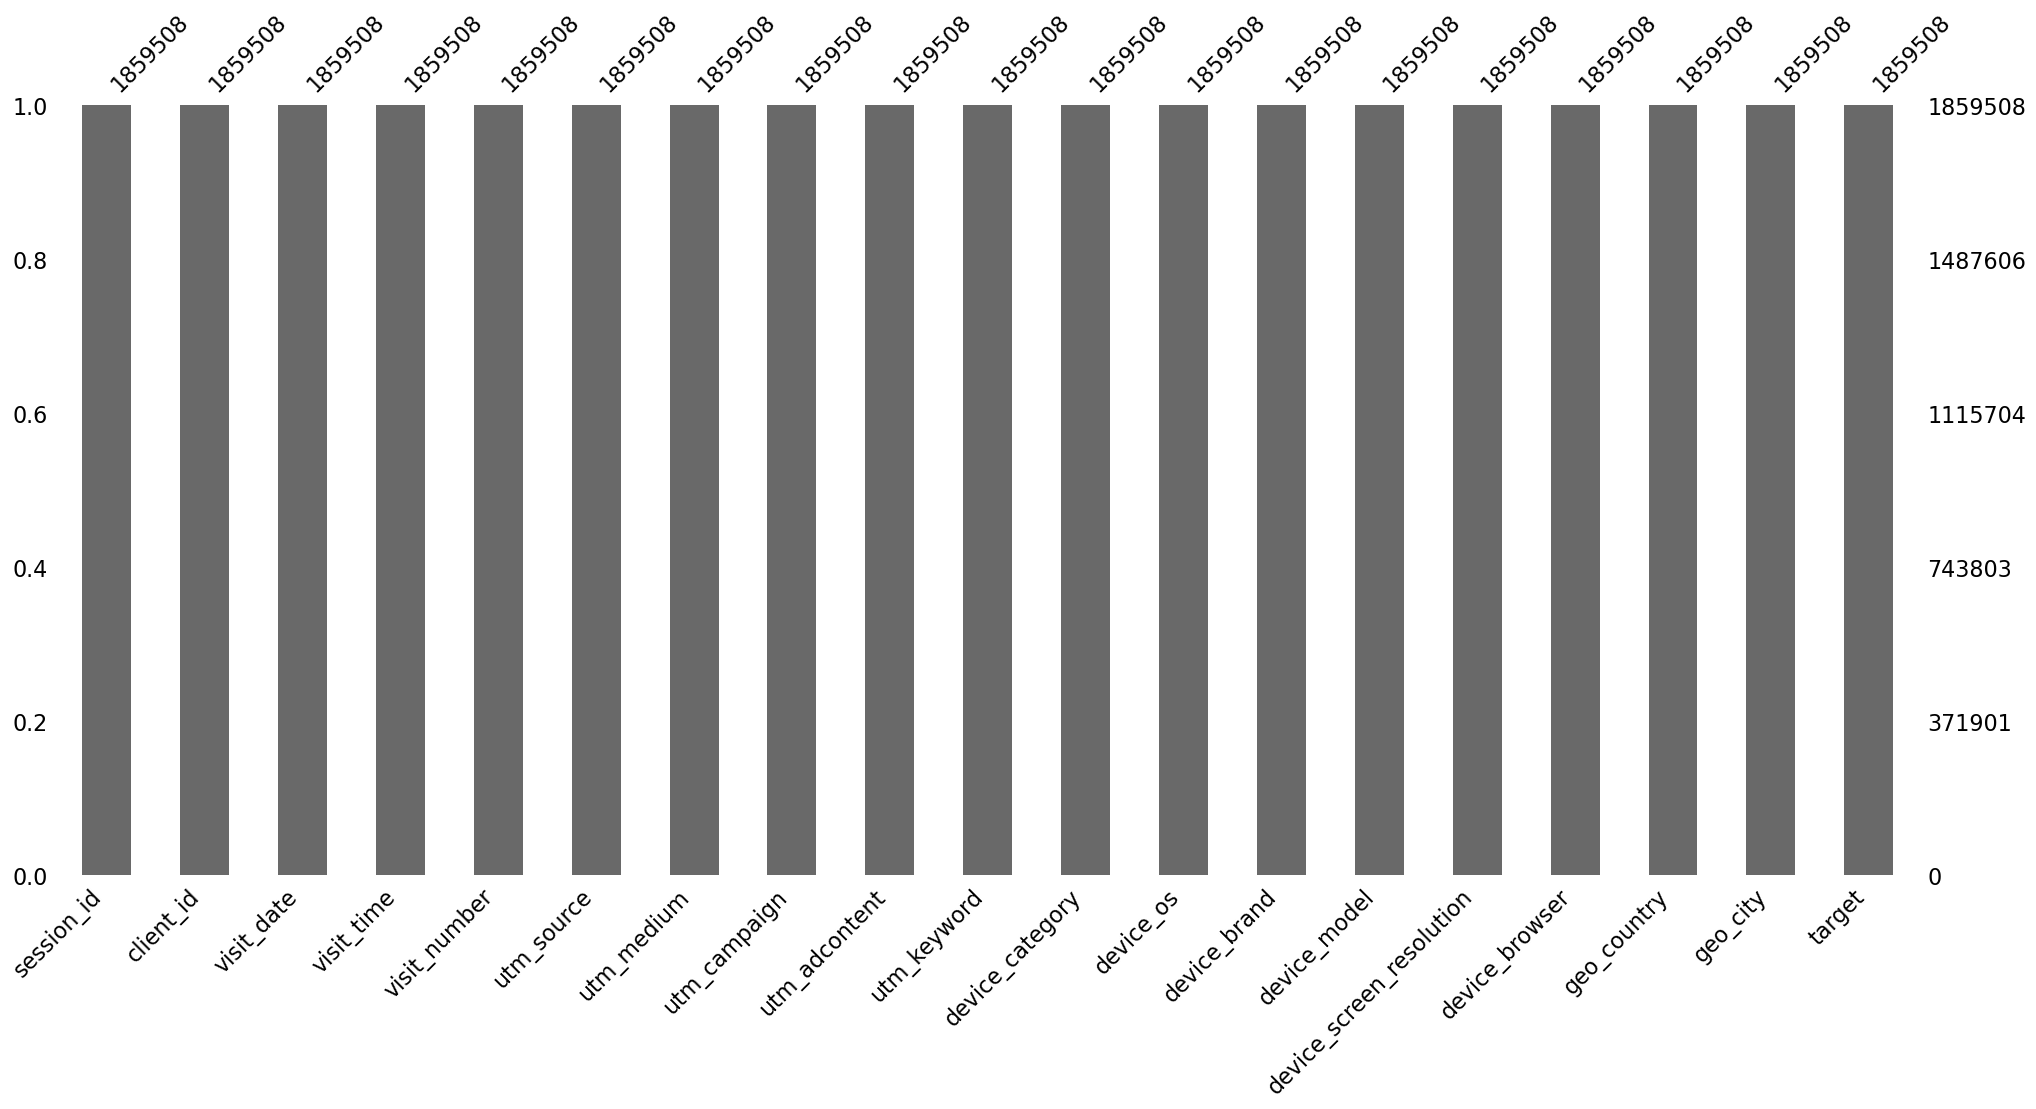

In [61]:
msno.bar(df)

In [69]:
df.to_csv('sessions_full.csv')

# Data Visualization

In [18]:
df = pd.read_csv("sessions_unv.csv", low_memory=False)
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target                    float64
dtypes: float64(1), int64(1), object(17)
memory usage: 269.6+ MB


 1                 utm_source   target
153  ZpYIoDJMcFzVoPFsHGJL  15998.0
183  fDLlAcSmythWSCVMvqvL  10531.0
217  kjsLglQLzykiRbcDiGcD   6293.0
161  bByPQxmDaMXgpHeypKSM   5557.0
5    BHcvLfOaCWvWTykYqHVe   3882.0
 2                 utm_source  target
79   MvfHsxITijuriZxsqZqt  2249.0
99   QxAxdyPLuQMEcrdZWdWb  1404.0
49   ISrKoXQCxqqYvAZICvjs   141.0
50   IZEXUFLARCUMynmHNBGo    98.0
196  gVRrcxiDQubJiljoTbGm    80.0


([<matplotlib.patches.Wedge at 0x23d29564290>,
 [Text(-0.20378893966518216, 1.0809579400097586, 'MvfHsxITijuriZxsqZqt'),
  Text(-0.1111059450529058, -1.0943744646938274, 'QxAxdyPLuQMEcrdZWdWb'),
  Text(0.9832671440660048, -0.49313864521073864, 'ISrKoXQCxqqYvAZICvjs'),
  Text(1.0577241003837656, -0.3020260377307792, 'IZEXUFLARCUMynmHNBGo'),
  Text(1.0893797513146937, -0.15248526953622862, 'gVRrcxiDQubJiljoTbGm'),
  Text(1.0991939998306355, -0.04210167141966008, 'PlbkrSYoHuZBWfYjYnfw')],
 [Text(-0.11115760345373571, 0.5896134218235046, '55.93%  (2249)'),
  Text(-0.060603242756130424, -0.596931526196633, '34.92%  (1404)'),
  Text(0.5363275331269116, -0.26898471556949377, '3.51%  (141)'),
  Text(0.5769404183911447, -0.16474147512587956, '2.44%  (98)'),
  Text(0.5942071370807419, -0.08317378338339741, '1.99%  (80)'),
  Text(0.5995603635439829, -0.02296454804708731, '1.22%  (49)')])

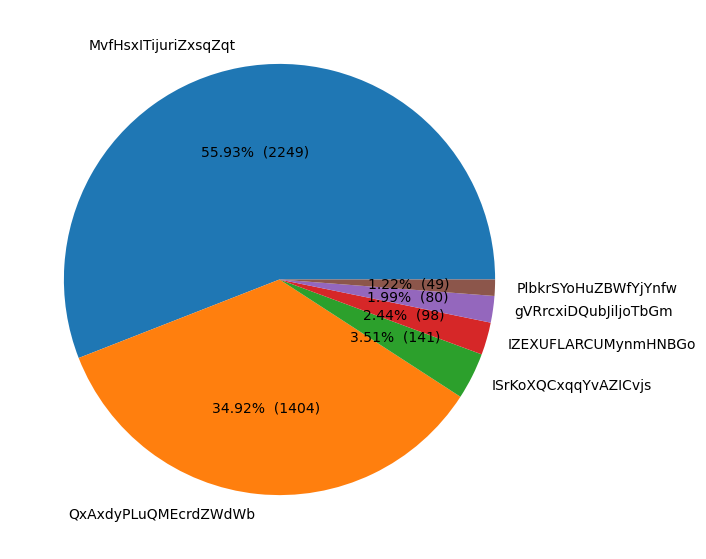

In [51]:
filter_list=['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
'gVRrcxiDQubJiljoTbGm']


def make_autopct(values):
    
    
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    
    
    return my_autopct


as_index = False
stats = df.groupby(['utm_source'], as_index=False)[['target']].sum()
stats = stats.sort_values('target', ascending=False)
stats1 = stats.iloc[0:5]
print(' 1 ',stats1.head())

stats2=stats[stats.utm_source.isin (filter_list)]
print(' 2 ',stats2.head())
fig = plt.figure(figsize=(10, 7))
plt.pie(stats2['target'], labels=stats2['utm_source'],autopct=make_autopct(stats2['target']))

 рекомендация для реклама  
               utm_source   target
153  ZpYIoDJMcFzVoPFsHGJL  15998.0
183  fDLlAcSmythWSCVMvqvL  10531.0
217  kjsLglQLzykiRbcDiGcD   6293.0
161  bByPQxmDaMXgpHeypKSM   5557.0
5    BHcvLfOaCWvWTykYqHVe   3882.0


([<matplotlib.patches.Wedge at 0x23d295e2b90>,
 [Text(0.40958431873249235, 1.0209018982490141, 'ZpYIoDJMcFzVoPFsHGJL'),
  Text(-1.0997849556169952, -0.021749744792167083, 'fDLlAcSmythWSCVMvqvL'),
  Text(-0.32545290184559467, -1.0507523060551816, 'kjsLglQLzykiRbcDiGcD'),
  Text(0.6033244454783537, -0.919782372894935, 'bByPQxmDaMXgpHeypKSM'),
  Text(1.0545139396575207, -0.3130500775722229, 'BHcvLfOaCWvWTykYqHVe')],
 [Text(0.22340962839954126, 0.5568555808630985, '37.86%  (15998)'),
  Text(-0.5998827030638154, -0.011863497159363861, '24.92%  (10531)'),
  Text(-0.17751976464305164, -0.5731376214846444, '14.89%  (6293)'),
  Text(0.3290860611700111, -0.5016994761245099, '13.15%  (5557)'),
  Text(0.5751894216313749, -0.17075458776666705, '9.19%  (3882)')])

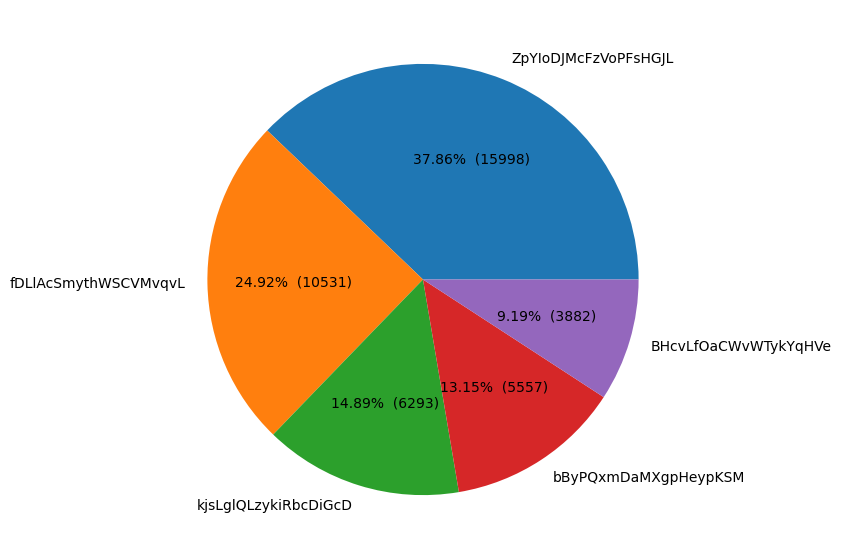

In [52]:
print(' рекомендация для реклама  ')
print(stats1.head())

fig = plt.figure(figsize=(10, 7))
plt.pie(stats1['target'], labels=stats1['utm_source'],autopct=make_autopct(stats1['target']))

           utm_campaign  target
0  AdtHYglxfCpTpwZeTAuW     0.0
1  AqudXfUnmXWSDWVGYaXr    10.0
2  BAZCuyHZnaPrMGOMrcCQ     1.0
3  BHcvLfOaCWvWTykYqHVe     0.0
4  BHqsCPwtnpaQSryaVXya     1.0


([<matplotlib.patches.Wedge at 0x23d29c01b10>,
 [Text(1.1, 0.0, 'AdtHYglxfCpTpwZeTAuW'),
  Text(-0.9526279098330698, 0.5500000594609756, 'AqudXfUnmXWSDWVGYaXr'),
  Text(0.7778173682745392, -0.7778175503358548, 'BAZCuyHZnaPrMGOMrcCQ'),
  Text(0.9526278840857078, -0.5500001040567061, 'BHcvLfOaCWvWTykYqHVe'),
  Text(1.062518380041041, -0.2847010573829372, 'BHqsCPwtnpaQSryaVXya')],
 [Text(0.6, 0.0, '0.00%  (0)'),
  Text(-0.5196152235453108, 0.3000000324332594, '83.33%  (10)'),
  Text(0.4242640190588395, -0.42426411836501166, '8.33%  (1)'),
  Text(0.519615209501295, -0.30000005675820324, '0.00%  (0)'),
  Text(0.5795554800223859, -0.15529148584523847, '8.33%  (1)')])

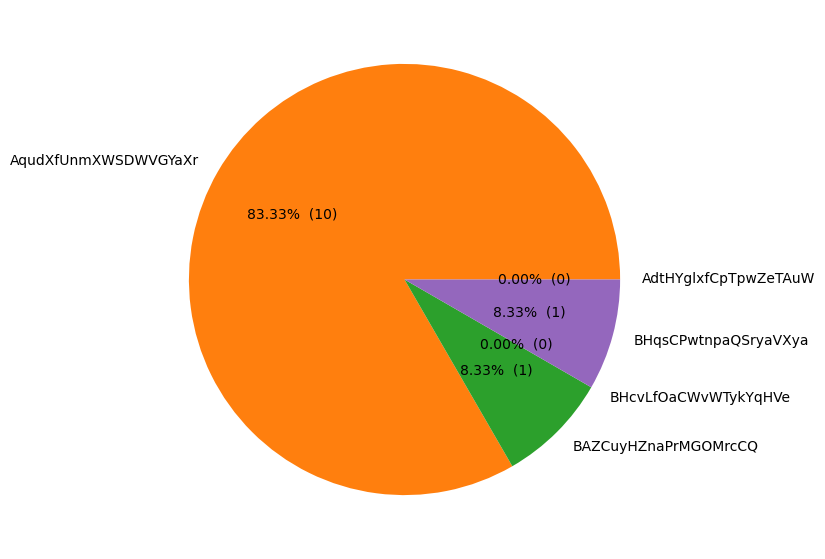

In [55]:
as_index=False
stats_k = df.groupby(['utm_campaign'], as_index=False)[['target']].sum()
stats_k = stats_k.iloc[0:5]
print(stats_k.head())
fig = plt.figure(figsize=(10, 7))
plt.pie(stats_k['target'], labels=stats_k['utm_campaign'],autopct=make_autopct(stats_k['target']))

  device_category   target
0         desktop  11513.0
1          mobile  38379.0
2          tablet    422.0


([<matplotlib.patches.Wedge at 0x23d29c5c590>,
 [Text(0.8278063826885265, 0.7243870462536841, 'desktop'),
  Text(-0.8466041346535446, -0.7023257358146029, 'mobile'),
  Text(1.0996181545990955, -0.028981271126016696, 'tablet')],
 [Text(0.45153075419374167, 0.39512020704746403, '22.88%  (11513)'),
  Text(-0.46178407344738787, -0.38308676498978333, '76.28%  (38379)'),
  Text(0.5997917206904156, -0.015807966068736377, '0.84%  (422)')])

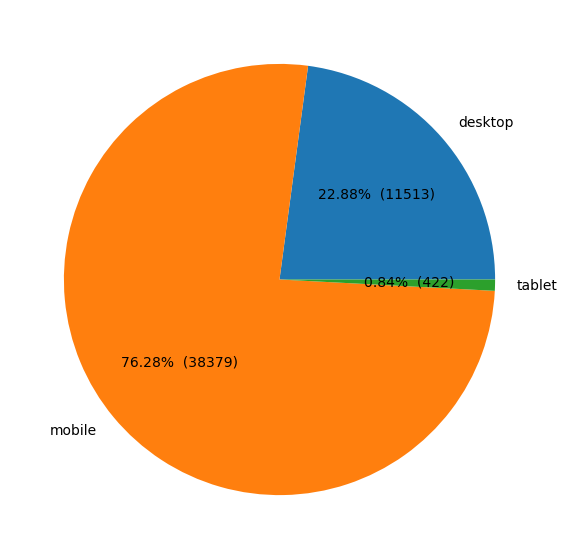

In [56]:
as_index=False
stats_d = df.groupby(['device_category'], as_index=False)[['target']].sum()
stats_d=stats_d.iloc[0:5]
print(stats_d.head())
fig = plt.figure(figsize=(10, 7))
plt.pie(stats_d['target'], labels=stats_d['device_category'],autopct=make_autopct(stats_d['target']))

# Feature Engineering

In [4]:
df = pd.read_csv('sessions_full.csv', low_memory=False)
df = df.drop(columns = ['Unnamed: 0'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859508 entries, 0 to 1859507
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   utm_source                object 
 2   utm_medium                object 
 3   utm_campaign              object 
 4   utm_adcontent             object 
 5   utm_keyword               object 
 6   device_category           object 
 7   device_os                 object 
 8   device_brand              object 
 9   device_model              object 
 10  device_screen_resolution  object 
 11  device_browser            object 
 12  geo_country               object 
 13  geo_city                  object 
 14  target                    float64
dtypes: float64(1), object(14)
memory usage: 212.8+ MB


In [10]:
# Выведем категориальные переменные

columns = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
           'utm_keyword', 'device_category', 'device_os', 'device_brand',
           'device_model', 'device_screen_resolution', 'device_browser',
           'geo_country', 'geo_city']

for column in columns:
    print(column, df[column].nunique())

utm_source 293
utm_medium 52
utm_campaign 413
utm_adcontent 287
utm_keyword 1220
device_category 3
device_os 14
device_brand 207
device_model 105
device_screen_resolution 5037
device_browser 57
geo_country 166
geo_city 2548


In [5]:
dlb = df.groupby(['target'], as_index=False)[['session_id']].count()
dlb

,target,session_id
0,0.0,1809204
1,1.0,50304


In [73]:
k = 100/(1809204+50304)
log1 = k*50304
log0 = k*1809204
print('log1=',log1,'log0=',log0)

log1= 2.705231706451384 log0= 97.29476829354861


In [6]:
n_target = len(df[df['target'] == 1])
df_short = pd.concat([df[df['target'] == 1], df[df['target'] == 0].sample(n=2*n_target, random_state=12)]).reset_index(drop=True)

In [75]:
df_short.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055768928391199041.1623652678.1623652678,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1.0
1,9055789093275396095.1636395007.1636395007,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1.0
2,9055794766915104430.1624305327.1624305327,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1.0
3,9056028189803556573.1630154471.1630154471,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1.0
4,9056093322981390023.1628944098.1628944098,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1.0


In [75]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150912 entries, 0 to 150911
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                150912 non-null  object 
 1   client_id                 150912 non-null  object 
 2   visit_date                150912 non-null  object 
 3   visit_time                150912 non-null  object 
 4   visit_number              150912 non-null  int64  
 5   utm_source                150912 non-null  object 
 6   utm_medium                150912 non-null  object 
 7   utm_campaign              150912 non-null  object 
 8   utm_adcontent             150912 non-null  object 
 9   utm_keyword               150912 non-null  object 
 10  device_category           150912 non-null  object 
 11  device_os                 150912 non-null  object 
 12  device_brand              150912 non-null  object 
 13  device_model              150912 non-null  o

In [7]:
# Удалим лишние поля
df_short = df_short.drop(columns=['session_id'])
df_short.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1.0
1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1.0
2,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1.0
3,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1.0
4,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1.0


## Кодирование категориальных переменных

In [91]:
# ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False, max_categories=100)
# ohe.fit(df_short.drop(columns='target')[columns])

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=100,
              sparse_output=False)

In [49]:
X = df_short.drop(columns=['target'])
y = df_short['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# Apply transformations to the training set only
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False, max_categories=100)
encoder.fit_transform(X_train)
encoder.transform(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
X_train.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
24007,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Moscow
94947,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,RrhnkuoaqckNtJpAZDzH,mobile,Android,Xiaomi,noname,760x360,Chrome,Russia,Balashikha
106103,ZpYIoDJMcFzVoPFsHGJL,push,sbJRYgVfvcnqKJNDDYIr,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,(not set),AuMdmADEIoPXiWpTsBEj,384x854,Samsung Internet,Uzbekistan,Tashkent
131746,MvfHsxITijuriZxsqZqt,cpv,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,other,mobile,Android,Huawei,noname,320x694,Chrome,Russia,Moscow
16198,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,noname,360x800,Chrome,Russia,Moscow


In [51]:
df_short.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1.0
1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1.0
2,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1.0
3,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1.0
4,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1.0


In [52]:
ohe_columns = encoder.transform(X_train[columns])
ohe_columns

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
ohe_columns.shape

(120729, 926)

In [54]:
y_train_df = pd.DataFrame(y_train)

In [55]:
df_prepared = pd.concat([pd.DataFrame(ohe_columns, columns=encoder.get_feature_names_out()), y_train_df['target']], axis=1)

In [58]:
ohe_columns_test = encoder.transform(X_test[columns])
ohe_columns_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
ohe_columns_test.shape

(30183, 926)

In [60]:
y_test_df = pd.DataFrame(y_test)

In [61]:
df_prepared_test = pd.concat([pd.DataFrame(ohe_columns_test, columns=encoder.get_feature_names_out()), y_test_df['target']], axis=1)

In [62]:
y_test_df.head()

,target
25384,1.0
125113,0.0
147978,0.0
148039,0.0
87552,0.0


In [99]:
y_train_df.head()

,target
24007,1.0
94947,0.0
106103,0.0
131746,0.0
16198,1.0


In [101]:
df_prepared

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,...,geo_city_Vologda,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_infrequent_sklearn,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
125078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
139511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
150512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [63]:
df_prepared_test

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,...,geo_city_Vologda,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_infrequent_sklearn,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
103540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [56]:
df_prepared['target'].value_counts()

target
0.0    80486
1.0    40243
Name: count, dtype: int64

In [103]:
df_prepared.head()

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,...,geo_city_Vologda,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_infrequent_sklearn,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [57]:
df_prepared.to_csv('prepared_full.csv')

In [64]:
df_prepared_test.to_csv('prepared_full_test.csv')

# Modelling

In [65]:
df = pd.read_csv('prepared_full.csv', low_memory=False)
df = df.drop(columns = ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144855 entries, 0 to 144854
Columns: 927 entries, utm_source_AHgbtEjTEsiUMJouiDYS to target
dtypes: float64(927)
memory usage: 1.0 GB


In [70]:
# Выделим фичи и целевую переменную
df.target = df.target.astype(int)
x_train = df.drop(['target'], axis=1)
y_train = df['target']

In [69]:
df['target'].isna().sum()

0

In [68]:
df['target'] = df['target'].fillna(0)

In [72]:
df_test = pd.read_csv('prepared_full_test.csv', low_memory=False)
df_test.head()

,Unnamed: 0,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,...,geo_city_Vologda,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_infrequent_sklearn,target
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
df_test = df_test.drop(columns = ['Unnamed: 0'])

In [74]:
df_test.head()

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,utm_source_FTAuYVNoYYxgvKMpKSLW,...,geo_city_Vologda,geo_city_Voronezh,geo_city_Vyborg,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_infrequent_sklearn,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
df_test.target = df_test.target.astype(int)
x_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

In [85]:
x_train2 = x_train.fillna(0)

In [86]:
x_train2.isna().sum()

utm_source_AHgbtEjTEsiUMJouiDYS    0
utm_source_BHcvLfOaCWvWTykYqHVe    0
utm_source_BKeImrJuRDZcHiSSTdzm    0
utm_source_CFeqZLBNQdYHxJrTOHjY    0
utm_source_CgsxHpdTmXHvrHqEKRxp    0
                                  ..
geo_city_Yekaterinburg             0
geo_city_Yuzhno-Sakhalinsk         0
geo_city_Zheleznodorozhny          0
geo_city_Zhukovskiy                0
geo_city_infrequent_sklearn        0
Length: 926, dtype: int64

In [92]:
x_test2 = x_test.fillna(0)

In [71]:
y_train.value_counts()

target
0    104612
1     40243
Name: count, dtype: int64

In [81]:
y_test.value_counts()

target
0    44234
1    10061
Name: count, dtype: int64

## Логистическая регрессия

In [88]:
parameters_logreg = {'C': [0.25, 0.5, 1, 2]}

logreg = LogisticRegression(solver='liblinear',
                            class_weight='balanced',
                            tol=1e-6,
                            random_state=12)

clf_logreg = GridSearchCV(logreg, parameters_logreg, cv=4, scoring='roc_auc', verbose=100)
clf_logreg.fit(x_train2, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4; 1/4] START C=0.25......................................................
[CV 1/4; 1/4] END .......................C=0.25;, score=0.499 total time=  12.6s
[CV 2/4; 1/4] START C=0.25......................................................
[CV 2/4; 1/4] END .......................C=0.25;, score=0.501 total time=   8.1s
[CV 3/4; 1/4] START C=0.25......................................................
[CV 3/4; 1/4] END .......................C=0.25;, score=0.499 total time=   7.8s
[CV 4/4; 1/4] START C=0.25......................................................
[CV 4/4; 1/4] END .......................C=0.25;, score=0.894 total time=   7.8s
[CV 1/4; 2/4] START C=0.5.......................................................
[CV 1/4; 2/4] END ........................C=0.5;, score=0.499 total time=   7.6s
[CV 2/4; 2/4] START C=0.5.......................................................
[CV 2/4; 2/4] END ........................C=0.5;,

GridSearchCV(cv=4,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12, solver='liblinear',
                                          tol=1e-06),
             param_grid={'C': [0.25, 0.5, 1, 2]}, scoring='roc_auc',
             verbose=100)

In [89]:
pd.DataFrame(clf_logreg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,11.704675,2.223592,0.193755,0.008471,2,{'C': 2},0.498158,0.500831,0.499248,0.954002,0.613060,0.196845,1
2,10.430970,1.406571,0.205933,0.006649,1,{'C': 1},0.498373,0.500889,0.499108,0.946579,0.611237,0.193612,2
1,8.064348,0.701595,0.178827,0.023309,0.5,{'C': 0.5},0.498728,0.501112,0.498971,0.926130,0.606235,0.184694,3
0,8.754017,1.680986,0.399182,0.370683,0.25,{'C': 0.25},0.499112,0.501387,0.498840,0.894226,0.598391,0.170803,4


In [90]:
clf_logreg.best_params_

{'C': 2}

In [93]:
clf_logreg.best_estimator_.fit(x_test2, y_test)

LogisticRegression(C=2, class_weight='balanced', random_state=12,
                   solver='liblinear', tol=1e-06)

In [94]:
from sklearn.metrics import accuracy_score

preds = clf_logreg.predict(x_test2)
accuracy_score(y_test, preds)
print(f'Точность: {accuracy_score(y_test, preds):.5f}')

Точность: 0.61087


## Случайный лес

In [95]:
parameters_rf = {'min_samples_split': [2, 3, 4]}

rf = RandomForestClassifier(n_estimators=100,
                            max_features='sqrt',
                            min_samples_leaf=2,
                            bootstrap=False,
                            max_depth=100,
                            n_jobs=-1,
                            random_state=12)

clf_rf = GridSearchCV(rf, parameters_rf, cv=4, scoring='roc_auc', verbose=100)
clf_rf.fit(x_train2, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4; 1/3] START min_samples_split=2.........................................
[CV 1/4; 1/3] END ..........min_samples_split=2;, score=0.504 total time=  59.2s
[CV 2/4; 1/3] START min_samples_split=2.........................................
[CV 2/4; 1/3] END ..........min_samples_split=2;, score=0.502 total time=  55.9s
[CV 3/4; 1/3] START min_samples_split=2.........................................
[CV 3/4; 1/3] END ..........min_samples_split=2;, score=0.501 total time=  56.3s
[CV 4/4; 1/3] START min_samples_split=2.........................................
[CV 4/4; 1/3] END ..........min_samples_split=2;, score=0.945 total time= 1.3min
[CV 1/4; 2/3] START min_samples_split=3.........................................
[CV 1/4; 2/3] END ..........min_samples_split=3;, score=0.504 total time=  55.5s
[CV 2/4; 2/3] START min_samples_split=3.........................................
[CV 2/4; 2/3] END ..........min_samples_split=3;,

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(bootstrap=False, max_depth=100,
                                              min_samples_leaf=2, n_jobs=-1,
                                              random_state=12),
             param_grid={'min_samples_split': [2, 3, 4]}, scoring='roc_auc',
             verbose=100)

In [96]:
clf_rf.best_estimator_.fit(x_train2, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_jobs=-1, random_state=12)

In [97]:
preds = clf_rf.predict(x_test2)
accuracy_score(y_test, preds)
print(f'Точность: {accuracy_score(y_test, preds):.5f}')

Точность: 0.81374


## Многослойный персептрон

In [98]:
parameters_mlp = {'hidden_layer_sizes': [(2, 2), (5, 2)]}

mlp = MLPClassifier(activation='identity',
                    solver='lbfgs',
                    alpha=0.0001,
                    tol=1e-3,
                    max_iter=1000,
                    random_state=12)

clf_mlp = GridSearchCV(mlp, parameters_mlp, cv=4, scoring='roc_auc', verbose=100)
clf_mlp.fit(x_train2, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 1/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.502 total time=  13.2s
[CV 2/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 2/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.501 total time=  13.1s
[CV 3/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 3/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.503 total time=   9.4s
[CV 4/4; 1/2] START hidden_layer_sizes=(2, 2)...................................
[CV 4/4; 1/2] END ....hidden_layer_sizes=(2, 2);, score=0.039 total time=   5.4s
[CV 1/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 1/4; 2/2] END ....hidden_layer_sizes=(5, 2);, score=0.498 total time=  14.5s
[CV 2/4; 2/2] START hidden_layer_sizes=(5, 2)...................................
[CV 2/4; 2/2] END ....hidden_layer_sizes=(5, 2);, 

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='identity', max_iter=1000,
                                     random_state=12, solver='lbfgs',
                                     tol=0.001),
             param_grid={'hidden_layer_sizes': [(2, 2), (5, 2)]},
             scoring='roc_auc', verbose=100)

In [99]:
clf_mlp.best_estimator_.fit(x_train2, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=12, solver='lbfgs', tol=0.001)

In [100]:
preds = clf_mlp.predict(x_test2)
accuracy_score(y_test, preds)
print(f'Точность: {accuracy_score(y_test, preds):.5f}')

Точность: 0.81457


# Results

In [101]:
clf_mlp.best_estimator_.fit(x_train2, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=12, solver='lbfgs', tol=0.001)

In [102]:
model = clf_mlp
filename = 'model.pkl'

joblib.dump({
        'model': model.best_estimator_,
        'metadata': {
            'name': 'Sberavto Credit Approvement Prediction Model',
            'author': 'Zulfiya Usmonova',
            'version': 1,
            'date': datetime.now(),
            'type': type(model.best_estimator_).__name__,
            'auc': model.best_score_
        }
    }, filename)

['model.pkl']

# Pipeline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

from sklearn.neural_network import MLPClassifier

In [3]:
df_hits = pd.read_csv('ga_hits.csv', low_memory=False)

In [4]:
df_session = pd.read_csv('ga_sessions.csv', low_memory=False)

In [5]:
list=['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df_hits['target']=df_hits['event_action'].apply(lambda x: 1 if x in list else 0)

In [7]:
df_short = df_hits.groupby(['session_id'])['target'].sum().reset_index()
df_short["target"] = df_short["target"].apply(lambda x: 1 if x > 0 else 0)

In [8]:
df_session = df_session.drop(columns=['client_id', 'visit_date', 'visit_time', 'visit_number'])

In [9]:
df_session.head()

,session_id,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [10]:
df = df_session.merge(df_short, on=['session_id'], how='left')
df['target'].fillna(0, inplace=True)
df['target'].value_counts()

target
0.0    1809728
1.0      50314
Name: count, dtype: int64

In [11]:
feature_to_str = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'utm_keyword', 'device_category', 
                  'device_os', 'device_brand', 'device_model', 'device_screen_resolution', 
                  'device_browser', 'geo_country',  'geo_city']

for x in feature_to_str:
    df[x] = df[x].dropna().astype('str')

In [12]:
df['device_model'] = df['device_model'].fillna('noname')
df['utm_keyword'] = df['utm_keyword'].fillna('other')
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() & df['device_os'].isna(), ['device_os', 'device_brand']] = 'other'
df.loc[df['device_category'] == 'desktop', ['device_brand', 'device_os']].value_counts(dropna=False)
df.loc[(df['device_category'] == 'desktop') & df['device_brand'].isna() &
       ((df['device_os'] == 'Windows') | 
       (df['device_os'] == 'Linux') | 
       (df['device_os'] == 'Chrome OS') | 
       (df['device_os'] == '(not set)')), 
       'device_brand'] = 'PC'
df.loc[df['device_os'] == 'Macintosh', 'device_brand'] = 'Apple'
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'Macintosh'
df.loc[(df['device_category'] == 'desktop') & df['device_os'].isna(), 'device_os'] = 'Linux'
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'desktop') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'
df.loc[(df['device_category'] == 'mobile') & df['device_os'].isna(), 'device_os'] = 'Android'
df.loc[(df['device_brand'] == 'Apple') & 
       (df['device_category'] == 'tablet') & 
        df['device_os'].isna(), 'device_os'] = 'iOS'
df.loc[df['device_os'].isna() & (df['device_category'] == 'tablet'), 'device_os'] = 'Android'
df['utm_adcontent'] = df['utm_adcontent'].fillna('other')
df['utm_campaign'] = df['utm_campaign'].fillna('other')
df = df.dropna()

In [13]:
missing_values = df.isna().sum().sort_values(ascending=False)
print('Пропущенных значений:\n', missing_values)

Пропущенных значений:
 session_id                  0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target                      0
dtype: int64


In [14]:
n_target = len(df[df['target'] == 1])
df = pd.concat([df[df['target'] == 1], df[df['target'] == 0].sample(n=2*n_target, random_state=12)]).reset_index(drop=True)

In [15]:
df = df.drop(columns=['session_id'])
df

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Huawei,noname,360x780,Chrome,Russia,Moscow,1.0
1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,noname,414x736,Safari,Russia,Samara,1.0
2,BHcvLfOaCWvWTykYqHVe,cpc,other,other,other,desktop,other,other,noname,834x1112,Safari,Russia,Domodedovo,1.0
3,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,412x915,YaBrowser,Russia,Krasnodar,1.0
4,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Samsung,noname,360x740,Chrome,Russia,Moscow,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150907,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,noname,393x851,Chrome,Russia,Kirov,0.0
150908,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,mobile,Android,Apple,noname,414x896,Safari,Russia,Moscow,0.0
150909,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,other,desktop,other,other,noname,1600x900,Chrome,Russia,Khimki,0.0
150910,fgymSoTvjKPEgaIJqsiH,cpm,FTjNLDyTrXaWYgZymFkV,yYdBRbPmBMUZHXwqGxNx,oKjXDUsycmahkgMhGdAR,desktop,Linux,PC,noname,1366x768,Chrome,Russia,Moscow,0.0


In [16]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

In [17]:
pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_jobs=-1, random_state=12))])

In [24]:
pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', MLPClassifier())])

In [26]:
pipeline.fit(X_train, y_train)

C:\Users\HP\miniconda3\envs\csml\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('classifier', MLPClassifier())])

In [19]:
# Random Forest
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
print(f'ROC AUC: {roc_auc:.5f}')

Accuracy: 0.68827
ROC AUC: 0.55718


In [23]:
# MLP with best parameters
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
print(f'ROC AUC: {roc_auc:.5f}')

Accuracy: 0.68522
ROC AUC: 0.56550


In [27]:
# Default MLP
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.5f}')
print(f'ROC AUC: {roc_auc:.5f}')

Accuracy: 0.65053
ROC AUC: 0.58555
